In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

import sklearn
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import linear_model
from sklearn.svm import LinearSVR
from sklearn.ensemble import ExtraTreesRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import AdaBoostRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble import BaggingRegressor

from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error

In [2]:
df = pd.read_csv("pf_medianagg.csv")
df.drop(df.columns[[0]], axis=1, inplace=True)

In [3]:
df.head()

,school_id,pct_native,pct_asian,pct_hispanic,pct_black,pct_white,pct_pacisl,pct_mixed,free_lunch,reduced_lunch,...,LANDAREA,r_native,r_asian,r_hispanic,r_black,r_white,r_pacisl,r_mixed,r_foodassist,schoolwide_achi
0,1.000050e+10,0.002190,0.006569,0.401460,0.027737,0.543796,0.001460,0.016788,0.310949,0.076343,...,26.779523,inf,inf,24.645257,147.527906,12.947729,inf,25.795815,1.946739,20.0
1,1.000060e+10,0.000000,0.002933,0.043988,0.020528,0.926686,0.000000,0.005865,0.563050,0.046921,...,488.942901,NaN,inf,NaN,inf,61.245940,NaN,24.188270,4.208489,14.5
2,1.000060e+10,0.016639,0.004992,0.277870,0.011647,0.687188,0.000000,0.001664,0.623960,0.089850,...,488.942901,inf,inf,NaN,inf,45.417181,NaN,6.862063,4.663760,15.0
3,1.000060e+10,0.004386,0.004386,0.019737,0.010965,0.953947,0.000000,0.006579,0.381579,0.054825,...,488.942901,inf,inf,NaN,inf,63.047666,NaN,27.132237,2.852094,30.0
4,1.016900e+10,0.003289,0.011513,0.078947,0.078947,0.794408,0.001645,0.031250,0.328947,0.019737,...,25.386423,inf,45.443481,26.543576,67.210526,13.824289,inf,34.790064,2.038661,30.0


In [4]:
df = df.replace([np.inf, -np.inf], np.nan)
for i in range(len(df.columns)):
    df.iloc[:, i] = df.iloc[:, i].fillna(df.iloc[:, i].median(skipna=True))

In [5]:
[(df.columns.get_loc(c), c) for c in df.columns]

[(0, 'school_id'),
 (1, 'pct_native'),
 (2, 'pct_asian'),
 (3, 'pct_hispanic'),
 (4, 'pct_black'),
 (5, 'pct_white'),
 (6, 'pct_pacisl'),
 (7, 'pct_mixed'),
 (8, 'free_lunch'),
 (9, 'reduced_lunch'),
 (10, 'total'),
 (11, 'grad_rate_all'),
 (12, 'grad_rate_native'),
 (13, 'grad_rate_asian'),
 (14, 'grad_rate_black'),
 (15, 'grad_rate_hispanic'),
 (16, 'grad_rate_mixed'),
 (17, 'grad_rate_linc'),
 (18, 'total_salaries_ps'),
 (19, 'salaries_instruction_ps'),
 (20, 'salaries_teachers_ps'),
 (21, 'AHY1E001'),
 (22, 'AHY2E002'),
 (23, 'AHY2E003'),
 (24, 'AHY2E004'),
 (25, 'AHY2E005'),
 (26, 'AHY2E006'),
 (27, 'AHY2E007'),
 (28, 'AHY2E008'),
 (29, 'AHZBE003'),
 (30, 'AHZUE009'),
 (31, 'AHZUE015'),
 (32, 'AH04E017'),
 (33, 'AH04E018'),
 (34, 'AH04E022'),
 (35, 'AH04E023'),
 (36, 'AH04E024'),
 (37, 'AH04E025'),
 (38, 'AH1JE002'),
 (39, 'AH1JE003'),
 (40, 'AH1JE004'),
 (41, 'AH1JE005'),
 (42, 'AH1JE006'),
 (43, 'AH1JE007'),
 (44, 'AH1JE008'),
 (45, 'AH1KE002'),
 (46, 'AH1LE001'),
 (47, 'AH1PE00

## Column Selection 1

In [28]:
cols = df.columns.tolist()
cols_s1 = cols[0:6] + cols[7:9] + cols[11:12] + cols[13:16] + cols[17:19] + cols[21:22] + cols[32:44] + cols[45:50] + cols[53:54] + cols[57:63] + cols[64:]
df1 = df[cols_s1]

In [29]:
data = df1.values

In [30]:
data.shape

(3000, 41)

In [31]:
features = data[:, 0:40]
labels = data[:, 40]

In [32]:
train, test, train_labels, test_labels = train_test_split(features, labels, test_size = 0.2)

In [33]:
lr = LinearRegression(normalize=True)
model = lr.fit(train, train_labels)

In [34]:
test_pred = model.predict(test)
mse_lr = mean_squared_error(test_labels, test_pred)
print(mse_lr)

160.88375069325593


In [35]:
dTreeRg = DecisionTreeRegressor()
model = dTreeRg.fit(train, train_labels)

In [36]:
test_pred = model.predict(test)
mse_dtr = mean_squared_error(test_labels, test_pred)
print(mse_dtr)

209.80041666666668


In [37]:
extTreeRg = ExtraTreesRegressor(n_estimators=100)
model = extTreeRg.fit(train, train_labels)

In [38]:
test_pred = extTreeRg.predict(test)
mse_etr = mean_squared_error(test_labels, test_pred)
print(mse_etr)

101.034944375


In [39]:
randForsRg = RandomForestRegressor(n_estimators=100)
model = randForsRg.fit(train, train_labels)

In [40]:
test_pred = randForsRg.predict(test)
mse_rfr = mean_squared_error(test_labels, test_pred)
print(mse_rfr)

102.286164875


In [41]:
aBoostRg = AdaBoostRegressor()
model = aBoostRg.fit(train, train_labels)

In [42]:
test_pred = aBoostRg.predict(test)
mse_abr = mean_squared_error(test_labels, test_pred)
print(mse_abr)

160.47409691247395


In [43]:
gBoostRg = GradientBoostingRegressor()
model = gBoostRg.fit(train, train_labels)

In [44]:
test_pred = gBoostRg.predict(test)
mse_gbr = mean_squared_error(test_labels, test_pred)
print(mse_gbr)

108.90385742830931


In [45]:
bagRg = BaggingRegressor()
model = bagRg.fit(train, train_labels)

In [46]:
test_pred = bagRg.predict(test)
mse_br = mean_squared_error(test_labels, test_pred)
print(mse_br)

115.90002499999997


## Column Selection 2

In [42]:
cols = df.columns.tolist()
cols_s2 = cols[0:6] + cols[7:9] + cols[11:12] + cols[13:16] + cols[17:19] + cols[21:22] + cols[32:44] + cols[45:50] + cols[53:54] + cols[65:] 
df2 = df[cols_s2]

In [55]:
[(i, cols_s2[i]) for i in range(len(cols_s2))]

[(0, 'school_id'),
 (1, 'pct_native'),
 (2, 'pct_asian'),
 (3, 'pct_hispanic'),
 (4, 'pct_black'),
 (5, 'pct_white'),
 (6, 'pct_mixed'),
 (7, 'free_lunch'),
 (8, 'grad_rate_all'),
 (9, 'grad_rate_asian'),
 (10, 'grad_rate_black'),
 (11, 'grad_rate_hispanic'),
 (12, 'grad_rate_linc'),
 (13, 'total_salaries_ps'),
 (14, 'AHY1E001'),
 (15, 'AH04E017'),
 (16, 'AH04E018'),
 (17, 'AH04E022'),
 (18, 'AH04E023'),
 (19, 'AH04E024'),
 (20, 'AH04E025'),
 (21, 'AH1JE002'),
 (22, 'AH1JE003'),
 (23, 'AH1JE004'),
 (24, 'AH1JE005'),
 (25, 'AH1JE006'),
 (26, 'AH1JE007'),
 (27, 'AH1KE002'),
 (28, 'AH1LE001'),
 (29, 'AH1PE001'),
 (30, 'AH19E002'),
 (31, 'AH19E003'),
 (32, 'AH3IE005'),
 (33, 'schoolwide_achi')]

In [7]:
data = df2.values

In [8]:
data.shape

(3000, 34)

In [9]:
features = data[:, 0:33]
labels = data[:, 33]

In [10]:
train, test, train_labels, test_labels = train_test_split(features, labels, test_size = 0.2)

In [11]:
lr = LinearRegression(normalize=True)
model = lr.fit(train, train_labels)

In [12]:
test_pred = model.predict(test)
mse_lr = mean_squared_error(test_labels, test_pred)
print(mse_lr)

152.25314704146547


In [13]:
dTreeRg = DecisionTreeRegressor()
model = dTreeRg.fit(train, train_labels)

In [14]:
test_pred = model.predict(test)
mse_dtr = mean_squared_error(test_labels, test_pred)
print(mse_dtr)

242.36083333333335


In [15]:
extTreeRg = ExtraTreesRegressor(n_estimators=100)
model = extTreeRg.fit(train, train_labels)

In [16]:
test_pred = extTreeRg.predict(test)
mse_etr = mean_squared_error(test_labels, test_pred)
print(mse_etr)

96.10912704166668


In [109]:
importances = extTreeRg.feature_importances_
print(importances)

[7.76146085e-02 1.36699250e-02 1.23752841e-01 2.21985921e-02
 3.14056125e-02 2.96435994e-02 1.42403952e-02 2.46341408e-01
 1.13375795e-01 4.20468355e-03 5.03486127e-03 5.22861642e-02
 4.46671711e-02 3.00474910e-02 1.75191099e-02 9.88671185e-03
 1.00127362e-02 9.26939905e-03 8.78787310e-03 9.20227848e-03
 7.60454627e-03 9.15996660e-03 1.15446602e-02 8.77100607e-03
 1.23693977e-02 1.18277353e-02 1.02296752e-02 1.46843800e-02
 1.90986536e-05 7.89382034e-03 9.52086286e-03 8.93564118e-03
 1.42779530e-02]


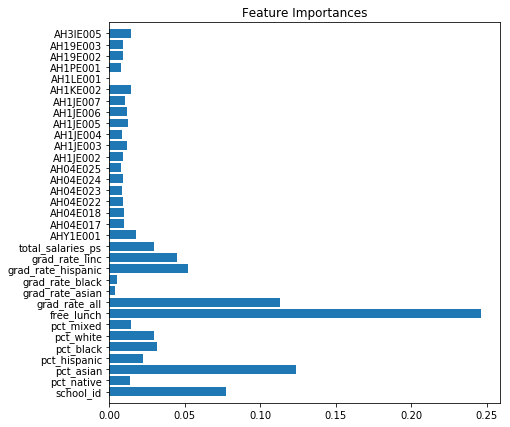

In [108]:
# Plot the feature importances of the forest
plt.figure(figsize=(7,7))
plt.title("Feature Importances")
plt.barh(range(train.shape[1]), importances, align="center")
# If you want to define your own labels,
# change indices to a list of labels on the following line.
plt.yticks(range(train.shape[1]), cols_s2[:-1])
plt.ylim([-1, train.shape[1]])
plt.show()

In [102]:
from sklearn.base import clone 

def drop_col_feat_imp(model, train, train_labels, test, test_labels):
    
    # clone the model to have the exact same specification as the one initially trained
    model_clone = clone(model)
    # training and scoring the benchmark model
    model_clone.fit(train, train_labels)
    test_pred = model_clone.predict(test)
    benchmark_mse = mean_squared_error(test_labels, test_pred)
    print(benchmark_mse)
    # list for storing feature importances
    importances = []
    
    # iterating over all columns and storing feature importance (difference between benchmark and new model)
    for i in range(train.shape[1]):
        model_clone = clone(model)
        model_clone.fit(np.delete(train, i, axis = 1), train_labels)
        test_pred = model_clone.predict(np.delete(test, i, axis = 1))
        drop_col_mse = mean_squared_error(test_labels, test_pred)
        print(drop_col_mse)
        importances.append(drop_col_mse - benchmark_mse)
    
    return importances

In [103]:
drop_importances = drop_col_feat_imp(extTreeRg, train, train_labels, test, test_labels)

95.26243895833333
100.08038174999999
95.22546291666667
99.73258683333333
94.51297891666667
93.47200695833334
97.92193645833335
94.13536187499999
101.51646475
100.42410562500001
95.82347325
94.18938195833334
95.86707133333333
95.26987654166666
99.71786254166666
94.23356762499999
96.00576958333333
96.16030425
97.59898966666668
96.09536275
95.56987358333332
95.65114958333334
97.30037504166667
95.52923295833332
95.16979933333333
97.10100766666666
94.62613037499999
96.89601
94.52842758333334
94.87228379166667
95.25765391666668
95.82119420833332
93.34657675
96.1734675


In [104]:
print(drop_importances)

[4.817942791666653, -0.03697604166666224, 4.470147874999995, -0.7494600416666657, -1.7904319999999956, 2.6594975000000147, -1.1270770833333472, 6.254025791666663, 5.161666666666676, 0.5610342916666724, -1.0730569999999915, 0.6046323749999942, 0.00743758333332778, 4.455423583333328, -1.028871333333342, 0.7433306249999987, 0.8978652916666618, 2.3365507083333483, 0.8329237916666727, 0.30743462499998486, 0.38871062500000164, 2.037936083333335, 0.2667939999999902, -0.09263962500000389, 1.8385687083333266, -0.6363085833333457, 1.63357104166667, -0.7340113749999944, -0.39015516666665917, -0.0047850416666506135, 0.5587552499999902, -1.915862208333337, 0.911028541666667]


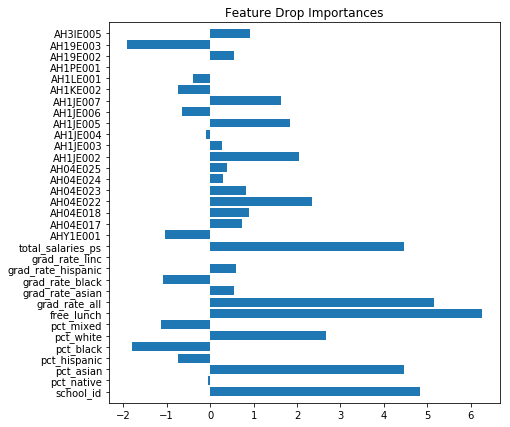

In [116]:
# Plot the feature importances of the forest
plt.figure(figsize=(7,7))
plt.title("Feature Drop Importances")
plt.barh(range(train.shape[1]), drop_importances, align="center")
# If you want to define your own labels,
# change indices to a list of labels on the following line.
plt.yticks(range(train.shape[1]), cols_s2[:-1])
plt.ylim([-1, train.shape[1]])
plt.show()

In [17]:
randForsRg = RandomForestRegressor(n_estimators=100)
model = randForsRg.fit(train, train_labels)

In [18]:
test_pred = randForsRg.predict(test)
mse_rfr = mean_squared_error(test_labels, test_pred)
print(mse_rfr)

97.79458229166667


In [19]:
aBoostRg = AdaBoostRegressor()
model = aBoostRg.fit(train, train_labels)

In [20]:
test_pred = aBoostRg.predict(test)
mse_abr = mean_squared_error(test_labels, test_pred)
print(mse_abr)

148.5717864931194


In [21]:
gBoostRg = GradientBoostingRegressor()
model = gBoostRg.fit(train, train_labels)

In [22]:
test_pred = gBoostRg.predict(test)
mse_gbr = mean_squared_error(test_labels, test_pred)
print(mse_gbr)

99.85423220877941


In [23]:
bagRg = BaggingRegressor()
model = bagRg.fit(train, train_labels)

In [24]:
test_pred = bagRg.predict(test)
mse_br = mean_squared_error(test_labels, test_pred)
print(mse_br)

109.95871666666669


## Column Selection Three

In [127]:
cols = df.columns.tolist()
cols_s3 = cols_s2[0:1] + cols_s2[2:3] + cols_s2[4:6] + cols_s2[7:9] + cols_s2[11:14] + cols_s2[15:23] + cols_s2[24:25] + cols_s2[26:27] + cols_s2[30:31] + cols_s2[32:]  
df3 = df[cols_s3]

In [128]:
[(i, cols_s3[i]) for i in range(len(cols_s3))]

[(0, 'school_id'),
 (1, 'pct_asian'),
 (2, 'pct_black'),
 (3, 'pct_white'),
 (4, 'free_lunch'),
 (5, 'grad_rate_all'),
 (6, 'grad_rate_hispanic'),
 (7, 'grad_rate_linc'),
 (8, 'total_salaries_ps'),
 (9, 'AH04E017'),
 (10, 'AH04E018'),
 (11, 'AH04E022'),
 (12, 'AH04E023'),
 (13, 'AH04E024'),
 (14, 'AH04E025'),
 (15, 'AH1JE002'),
 (16, 'AH1JE003'),
 (17, 'AH1JE005'),
 (18, 'AH1JE007'),
 (19, 'AH19E002'),
 (20, 'AH3IE005'),
 (21, 'schoolwide_achi')]

In [129]:
data = df3.values

In [130]:
data.shape

(3000, 22)

In [131]:
features = data[:, 0:18]
labels = data[:, 18]

In [132]:
train, test, train_labels, test_labels = train_test_split(features, labels, test_size = 0.2)

In [133]:
lr = LinearRegression(normalize=True)
model = lr.fit(train, train_labels)

In [134]:
test_pred = model.predict(test)
mse_lr = mean_squared_error(test_labels, test_pred)
print(mse_lr)

135.75229228873752


In [135]:
dTreeRg = DecisionTreeRegressor()
model = dTreeRg.fit(train, train_labels)

In [136]:
test_pred = model.predict(test)
mse_dtr = mean_squared_error(test_labels, test_pred)
print(mse_dtr)

183.895


In [137]:
extTreeRg = ExtraTreesRegressor(n_estimators=100)
model = extTreeRg.fit(train, train_labels)

In [138]:
test_pred = extTreeRg.predict(test)
mse_etr = mean_squared_error(test_labels, test_pred)
print(mse_etr)

82.80730645833333


In [281]:
extTreeRg_e1 = ExtraTreesRegressor(n_estimators=10)
model = extTreeRg_e1.fit(train, train_labels)

In [282]:
test_pred = extTreeRg_e1.predict(test)
mse_etr = mean_squared_error(test_labels, test_pred)
print(mse_etr)

114.4172375


In [300]:
extTreeRg_e2 = ExtraTreesRegressor(n_estimators=1000)
model = extTreeRg_e2.fit(train, train_labels)

In [301]:
test_pred = extTreeRg_e2.predict(test)
mse_etr = mean_squared_error(test_labels, test_pred)
print(mse_etr)

99.17635419541666


In [322]:
extTreeRg_d1 = ExtraTreesRegressor(n_estimators=100, max_depth=50)
model = extTreeRg_d1.fit(train, train_labels)

In [323]:
test_pred = extTreeRg_d1.predict(test)
mse_etr = mean_squared_error(test_labels, test_pred)
print(mse_etr)

99.99991241666666


## Visualizing Decision Trees

In [302]:
from sklearn.externals.six import StringIO  
from IPython.display import Image  
from sklearn.tree import export_graphviz
import pydotplus

In [303]:
dot_data = StringIO()
export_graphviz(extTreeRg.estimators_[0], out_file=dot_data,  
                filled=True, rounded=True,
                special_characters=True)
graph = pydotplus.graph_from_dot_data(dot_data.getvalue()) 
graph.write_pdf("extTreeRg_dtree_ex.pdf")

True

## Neural Network

In [82]:
import keras
import tensorflow as tf
from keras.models import Sequential
from keras.layers import Dense
from keras.wrappers.scikit_learn import KerasRegressor
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline

In [87]:
def baseline_model():
	# create model
	model = Sequential()
	model.add(Dense(13, input_dim=33, kernel_initializer='normal', activation='relu'))
	model.add(Dense(1, kernel_initializer='normal'))
	# Compile model
	model.compile(loss='mean_squared_error', optimizer='adam')
	return model

def larger_model():
	# create model
	model = Sequential()
	model.add(Dense(13, input_dim=33, kernel_initializer='normal', activation='relu'))
	model.add(Dense(6, kernel_initializer='normal', activation='relu'))
	model.add(Dense(1, kernel_initializer='normal'))
	# Compile model
	model.compile(loss='mean_squared_error', optimizer='adam')
	return model

In [98]:
estimators = []
estimators.append(('standardize', StandardScaler()))
estimators.append(('mlp', KerasRegressor(build_fn=larger_model, epochs=50, batch_size=5, verbose=0)))
pipeline = Pipeline(estimators)
kfold = KFold(n_splits=10)
results = cross_val_score(pipeline, features, labels, cv=kfold)

In [99]:
tf.cast(results.mean(), float)

<tf.Tensor 'Cast_6:0' shape=() dtype=float32>

In [100]:
print(results.mean())

-8375.137315381367
